In [1]:
'''
This contains some of the example scripts shown in the noptrex documentation.

Note that it is absolutely not necessary to keep reloading the libraries for each function block. I am just doing
that for consistency with the documentation. Any library that was previously loaded can be accessed. They only need to be loaded once.
'''
%load_ext autoreload
%autoreload 2

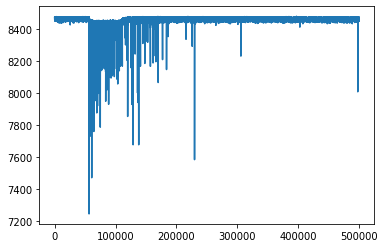

In [16]:
#very basic plotting example

import dataFile as df
import matplotlib.pyplot as plt

data = df.dataFile('run38833.bin')
waveform = data.wave(2)
plt.plot(waveform)
plt.savefig('basicPlottingExample.png')
plt.show()

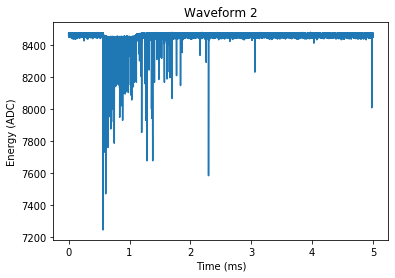

In [17]:
#plotting example with axis labels and properly scaling the x axis

import dataFile as df
import matplotlib.pyplot as plt
import numpy as np

waveNumber = 2
data = df.dataFile('run38833.bin')
waveform = data.wave(waveNumber)
xValues = np.arange(len(waveform))*10**(-5)
plt.plot(xValues, waveform)
plt.title('Waveform '+str(waveNumber))
plt.xlabel('Time (ms)')
plt.ylabel('Energy (ADC)')
plt.savefig('basicPlottingExampleWithLabels.png')
plt.show()

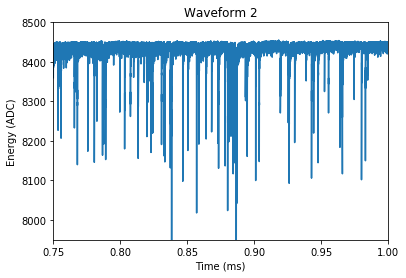

In [18]:
#plotting example zooming in on one particular window

import dataFile as df
import matplotlib.pyplot as plt
import numpy as np

waveNumber = 2
data = df.dataFile('run38833.bin')
waveform = data.wave(waveNumber)
xValues = np.arange(len(waveform))*10**(-5)
plt.plot(xValues, waveform)
plt.title('Waveform '+str(waveNumber))
plt.xlabel('Time (ms)')
plt.ylabel('Energy (ADC)')
plt.xlim(0.75, 1.0)
plt.ylim(7950, 8500)
plt.savefig('basicPlottingZoomedIn.png')
plt.show()

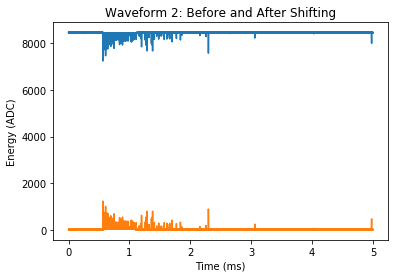

In [19]:
#This script shows the modification's done to each waveform before we do the analysis
import dataFile as df
import matplotlib.pyplot as plt
import numpy as np

waveNumber = 2
data = df.dataFile('run38833.bin')
waveform = data.wave(waveNumber)

shiftedWave = -waveform[:]
shiftedWave = shiftedWave[:] - np.mean(shiftedWave[0:1000])

xValues = np.arange(len(waveform))*10**(-5)
plt.plot(xValues, waveform, label='original waveform')
plt.plot(xValues, shiftedWave, label='after shifting')
plt.title('Waveform '+str(waveNumber)+': Before and After Shifting')
plt.xlabel('Time (ms)')
plt.ylabel('Energy (ADC)')
plt.savefig('waveformBeforeAndAfterShifting.png')
plt.show()

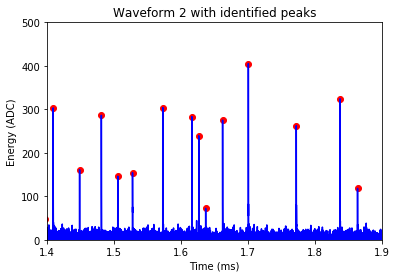

In [34]:
import dataFile as df
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

height = None 
threshold = None 
distance = 30
prominence = 50
width = None
wlen = None
rel_height = 0.5
plateau_size = None

waveNumber = 2
data = df.dataFile('run38833.bin')
waveform = data.wave(waveNumber)

shiftedWave = -waveform[:]
shiftedWave = shiftedWave[:] - np.mean(shiftedWave[0:1000])


peaks, properties = find_peaks(shiftedWave, height=height, threshold=threshold, 
                                distance=distance, prominence=prominence, width=width, 
                               wlen=wlen, rel_height=rel_height, plateau_size=plateau_size)
amps = shiftedWave[peaks]

xValues = np.arange(len(waveform))*10**(-5)
plt.plot(xValues, shiftedWave, color='b')
plt.scatter(peaks*10**(-5), amps, color='r')
plt.title('Waveform '+str(waveNumber)+' with identified peaks')
plt.xlabel('Time (ms)')
plt.ylabel('Energy (ADC)')
plt.xlim(1.4, 1.9)
plt.ylim(0,500)
plt.savefig('waveformWithPeaks.png')
plt.show()